[*********************100%***********************]  1 of 1 completed


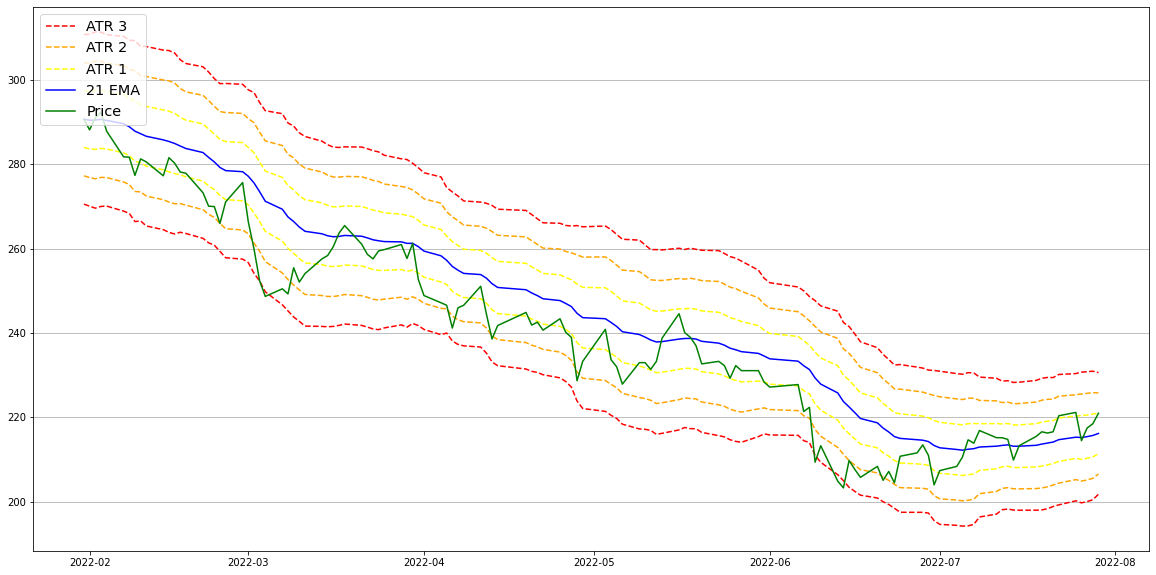

In [29]:
# 21 DAY EMA /W ATR RANGE OF 1-3

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

share = yf.download(tickers='SBRY.L', period='6mo')
share = share.drop(['Volume', 'Adj Close'], axis=1)

share["21EMA"] = share[["Close"]].ewm(span=21, adjust=False).mean()

# START: CLEAN THIS UP
start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("SBRY.L", start)
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift())
low_close = np.abs(data['Low'] - data['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(21).sum()/21
share["ATR"] = atr
share["ATR +1"] = share["21EMA"] + (share["ATR"] * 1)
share["ATR +2"] = share["21EMA"] + (share["ATR"] * 2)
share["ATR +3"] = share["21EMA"] + (share["ATR"] * 3)
share["ATR -1"] = share["21EMA"] + (share["ATR"] * -1)
share["ATR -2"] = share["21EMA"] + (share["ATR"] * -2)
share["ATR -3"] = share["21EMA"] + (share["ATR"] * -3)
# END: CLEAN THIS UP

plt.figure(figsize=(20,10))
plt.plot(share["ATR +3"], linestyle = 'dashed', label="ATR 3", color="Red")
plt.plot(share["ATR -3"], linestyle = 'dashed', color="Red")
plt.plot(share["ATR +2"], linestyle = 'dashed', label="ATR 2", color="Orange")
plt.plot(share["ATR -2"], linestyle = 'dashed', color="Orange")
plt.plot(share["ATR +1"], linestyle = 'dashed', label="ATR 1", color="Yellow")
plt.plot(share["ATR -1"], linestyle = 'dashed', color="Yellow")
plt.plot(share["21EMA"], label="21 EMA", color="Blue")
plt.plot(share["Close"], label="Price", color="Green")
plt.grid(axis = 'y')
plt.legend(loc='upper left',fontsize="x-large")

#https://www.tradingview.com/support/solutions/43000502266-keltner-channels-kc/


[*********************100%***********************]  1 of 1 completed


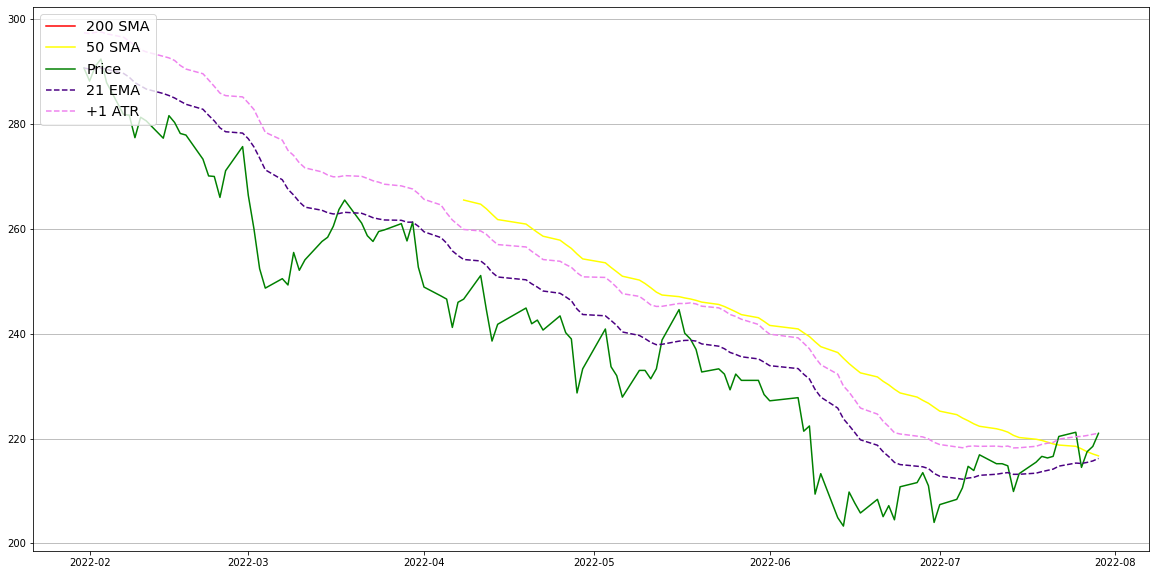

In [19]:
# CALCULATE THE MOVING AVERAGE OF SHELL OVER THE LAST 12 MONTHS

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shel = yf.download(tickers='SBRY.L', period='6mo')
shel = shel.drop(['Volume', 'Adj Close'], axis=1)



shel["50SMA"]=shel[["Close"]].rolling(50).mean()
shel["100SMA"]=shel[["Close"]].rolling(100).mean()
shel["200SMA"]=shel[["Close"]].rolling(200).mean()
shel["8EMA"] = shel[["Close"]].ewm(span=8, adjust=False).mean()
shel["21EMA"] = shel[["Close"]].ewm(span=21, adjust=False).mean()
shel["34EMA"] = shel[["Close"]].ewm(span=34, adjust=False).mean()

start = dt.datetime(2020, 1, 1)
data = pdr.get_data_yahoo("SBRY.L", start)
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift())
low_close = np.abs(data['Low'] - data['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
atr = true_range.rolling(21).sum()/21
shel["ATR"] = atr
shel["ATR +1"] = shel["21EMA"] + (shel["ATR"] * 1)
shel["ATR +2"] = shel["21EMA"] + (shel["ATR"] * 2)
shel["ATR +3"] = shel["21EMA"] + (shel["ATR"] * 3)
shel["ATR -1"] = shel["21EMA"] + (shel["ATR"] * -1)
shel["ATR -2"] = shel["21EMA"] + (shel["ATR"] * -2)
shel["ATR -3"] = shel["21EMA"] + (shel["ATR"] * -3)

plt.figure(figsize=(20,10))

plt.plot(shel["200SMA"],label="200 SMA", color = 'red')
#plt.plot(shel["100SMA"],label="100 SMA", color = 'orange')
plt.plot(shel["50SMA"],label="50 SMA", color = 'yellow')
plt.plot(shel["Close"],label="Price", color = 'green')
#plt.plot(shel["8EMA"],label="8 EMA", linestyle = 'dashed', color = 'blue')
plt.plot(shel["21EMA"],label="21 EMA", linestyle = 'dashed', color = 'indigo')
#plt.plot(shel["34EMA"],label="34 EMA", linestyle = 'dashed', color = 'violet')

plt.plot(shel["ATR +1"],label="+1 ATR", linestyle = 'dashed', color = 'violet')




plt.grid(axis = 'y')
plt.legend(loc='upper left',fontsize="x-large")